<a name = "inicio"></a>
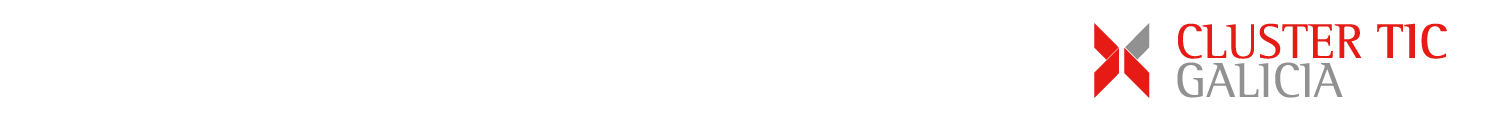

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Otros elementos gráficos</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
generator = np.random.Generator(np.random.PCG64(seed = 0))

Frecuentemente nos encontraremos en el caso de querer destacar algún elemento de nuestra visualización para que el lector de nuestro documento pueda enfocarse rápidamente en los aspectos más importantes. Con este objetivo, Matplotlib nos ofrece la posibilidad de incluir textos y otros elementos gráficos adicionales.

## Textos

El primero de los elementos que vamos a ver son los textos, útiles cuando deseamos destacar algún punto en la gráfica o transmitir información que ayude a su interpretación. Tenemos una función para esto: [matplotlib.pyplot.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html), función que tiene su [método equivalente aplicable a un conjunto de ejes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html).

Su funcionamiento es muy sencillo: se pasan en los dos primeros argumentos las coordenadas $x$ e $y$ (con respecto a los datos mostrados en la gráfica) en las que queremos que se muestre el texto y, como tercer argumento, el texto a mostrar. Por ejemplo:

In [3]:
y = generator.standard_normal(100).cumsum()

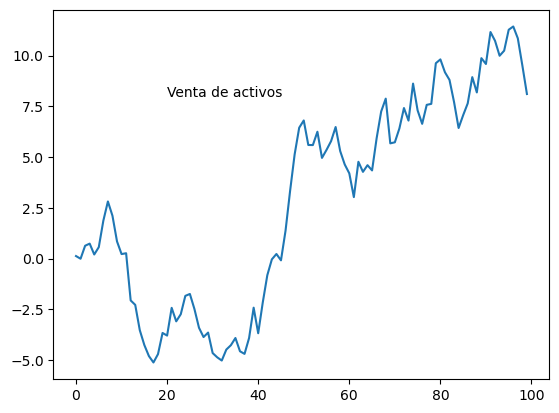

In [4]:
fig, ax = plt.subplots()
ax.plot(y)
ax.text(20, 8, "Venta de activos")
plt.show()

Podemos pasar como argumentos adicionales todos los atributos del texto que ya hemos visto:

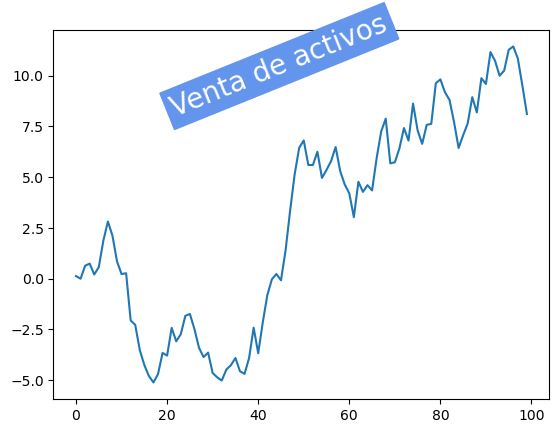

In [5]:
fig, ax = plt.subplots()
ax.plot(y)
ax.text(20, 8, "Venta de activos",
        rotation = 22,
        fontsize = 20,
        backgroundcolor = "CornflowerBlue",
        color = "w"
       )
plt.show()

Por defecto, la posición $x$ e $y$ dadas van referidas a los datos, como se ha comentado. Pero es posible modificar este comportamiento con el parámetro **transform**: Si toma el valor *ax.transAxes*, las posiciones serán interpretadas con respecto a las dimensiones de los ejes, siendo el punto (0, 0) el correspondiente a la esquina inferior izquierda de la gráfica, y el punto (1, 1) el correspondiente a la esquina superior derecha de la misma:

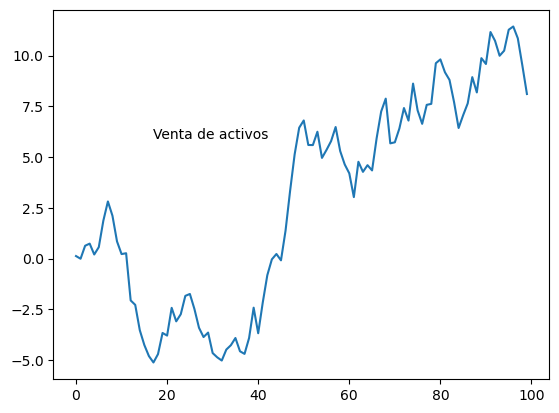

In [6]:
fig, ax = plt.subplots()
ax.plot(y)
ax.text(0.2, 0.65, "Venta de activos", transform = ax.transAxes)
plt.show()

Si el parámetro **transform** toma el valor *fig.transFigure*, las coordenadas serán interpretadas con respecto a las dimensiones de la figura, siendo el punto (0, 0) el correspondiente a la esquina inferior izquierda de la figura, y el punto (1, 1) el correspondiente a la esquina superior derecha de la misma. Hagamos un ejemplo con una figura de 2x2 conjuntos de ejes:

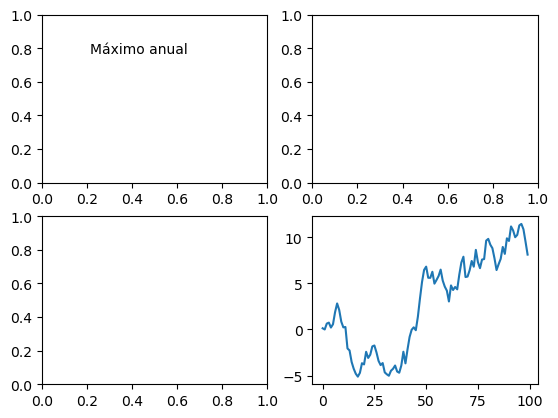

In [7]:
fig, ax = plt.subplots(2, 2)
ax[1, 1].plot(y)
ax[1, 1].text(0.2, 0.8, "Máximo anual", transform = fig.transFigure)
plt.show()

En esta matriz de conjuntos de ejes hemos situado nuestra gráfica en el conjunto de ejes que ocupa la posición (1, 1) -esquina inferior derecha-. Si quisiéramos que la etiqueta se mostrara en la esquina superior derecha de la gráfica, tendría que tener unas coordenadas de, aproximadamente, (0,5, 0.5) -es decir, cerca del centro de la figura-. Como las coordenadas fijadas en el ejemplo anterior son (0.2, 0.8), el texto se ha ido hasta el cuadrante que ocupa la posición superior izquierda.

## Anotaciones

Es posible "anotar" una posición $(x, y)$ con un texto, lo que no supone más que añadir el texto en la posición indicada -de forma semejante a como hace la función text-. La diferencia es que el texto puede ser mostrado en otras coordenadas, pudiendo mostrarse una flecha desde el texto hasta el punto que estamos "anotando". En su forma más básica, a la función [matplotlib.pyplot.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) (o al [método equivalente del conjunto de ejes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html)) simplemente le pasamos el texto a mostrar y una tupla con las coordenadas del punto que queremos anotar:

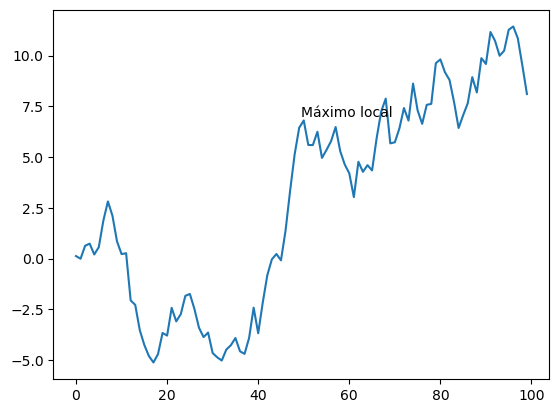

In [8]:
fig, ax = plt.subplots()
ax.plot(y)
ax.annotate("Máximo local", (49.5, 7.0))
plt.show()

Si le damos a la función como argumento una segunda tupla con posiciones $x$ e $y$, el texto se mostrará en éstas, con el punto "anotado" en la posición inicial:

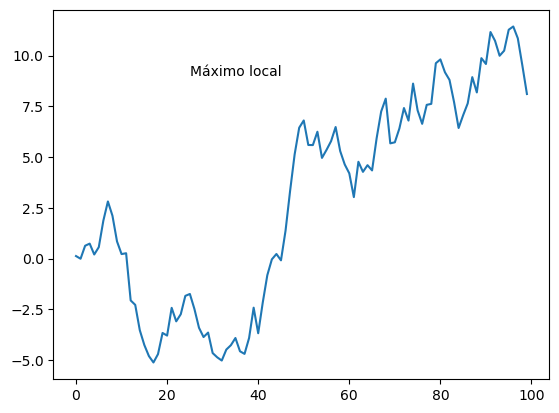

In [9]:
fig, ax = plt.subplots()
ax.plot(y)
ax.annotate("Máximo local", (49.5, 7.0), (25, 9))
plt.show()

Sin embargo el resultado, como vemos en la imagen anterior, no parece muy coherente: el texto se muestra en el segundo par de posiciones dadas, es cierto, pero no hay ninguna señal que distinga el punto siendo anotado: es como si estuviésemos anotando el punto (25, 9), y no el (49.5, 7.0). La forma de dar coherencia a esto es forzando que se muestre la flecha que apunta desde la etiqueta hasta el punto siendo anotado, y la forma de hacer esto es añadiendo el parámetro **arrowprops**. Este parámetro es un diccionario en el que se definen las propiedades de la flecha. Pero basta con que se trate de un diccionario vacío para que se muestre la flecha con sus atributos por defecto:

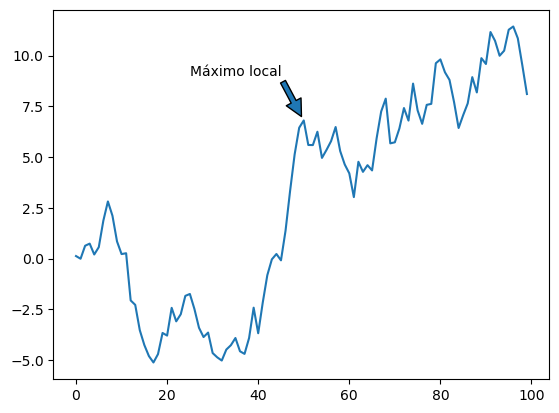

In [10]:
fig, ax = plt.subplots()
ax.plot(y)
ax.annotate("Máximo local", (49.5, 7.0), (25, 9), arrowprops = dict())
plt.show()

Puedes consultar en la [documentación de matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html) la posible configuración de la flecha.

## Líneas

Matplotlib incluye funciones para la creación de líneas horizontales, verticales y líneas con cualquier punto de origen y fin. En las siguientes secciones revisaremos estas funciones y haremos algunos ejemplos sencillos.

#### Líneas horizontales

La función [matplotlib.pyplot.axhline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) añade una línea horizontal al conjunto de ejes. Su principal parámetro, **y**, controla la coordenada $y$ de la línea:

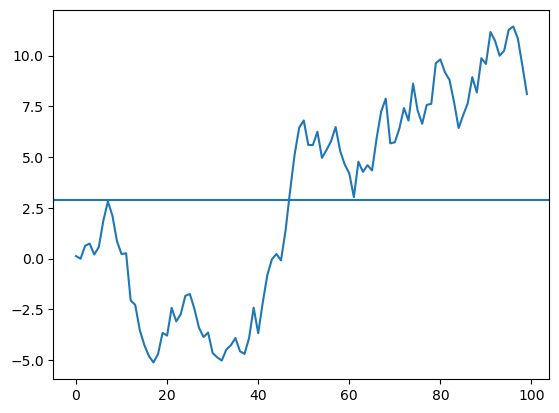

In [11]:
plt.plot(y);
plt.axhline(2.9);

Esta función admite muchos de los modificadores vistos: color, ancho de línea, etc.:

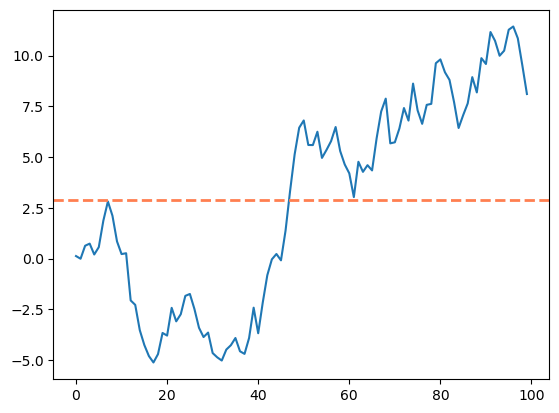

In [12]:
plt.plot(y);
plt.axhline(2.9, color = "Coral", linewidth = 2, linestyle = "dashed");

#### Líneas verticales

La función [matplotlib.pyplot.axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) es equivalente a la anterior, mostrando una línea vertical cuya coordenada $x$ se controla mediante el parámetro homónimo:

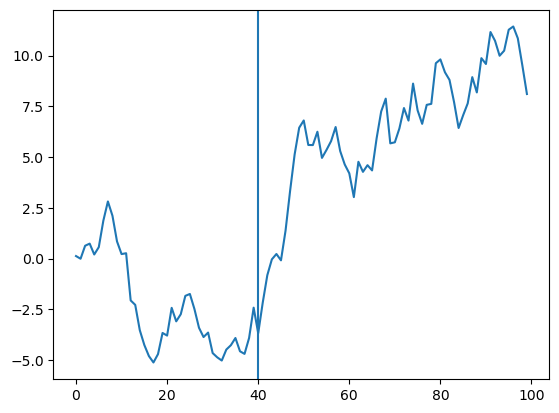

In [13]:
plt.plot(y);
plt.axvline(40);

También aquí podemos dar formato a la línea:

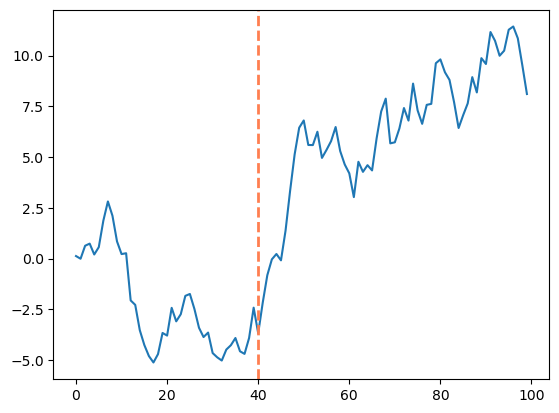

In [14]:
plt.plot(y);
plt.axvline(40, color = "Coral", linewidth = 2, linestyle = "dashed");

#### Otras líneas

Podemos mostrar líneas con cualquier punto de origen y cualquier punto de finalización con la función [matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html). Obsérvese que esta función no está en la sublibrería *pyplot*, lo que exige una importación diferente de la vista hasta ahora para la mayor parte de las funciones: o bien importamos *Matplotlib*, o *matplotlib.lines* o directamente la función desde esta última librería:

In [15]:
from matplotlib.lines import Line2D

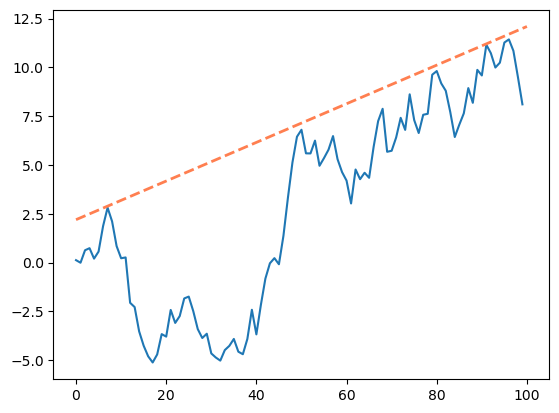

In [16]:
fig, ax = plt.subplots()
plt.plot(y);
line = Line2D(
    xdata = [0, 100],
    ydata = [2.2, 12.1],
    color = "Coral",
    linestyle = "dashed",
    linewidth = 2
)
ax.add_line(line)
plt.show()

La función **Line2D** incluye dos parámetros principales: **xdata**, tupla en la que se incluyen las coordenadas $x$ de los puntos inicial y final de la línea (0 y 100 en el ejemplo anterior) y **ydata**, otra tupla con las coordenadas $y$ de los puntos inicial y final de la línea (2.2 y 12.1 en el ejemplo). Una vez ejecutada esta función y almacenado su resultado en una variable, ésta se añade a la gráfica con el método **add_line** del conjunto de ejes.

## Figuras geométricas

Resulta relativamente fácil crear figuras geométricas en nuestras gráficas. Todo lo que necesitamos hacer es importar el objeto adecuado de la sublibrería [matplotlib.patches](https://matplotlib.org/stable/api/patches_api.html) ([Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html), [Circle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html), [Ellipse](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Ellipse.html), [Polygon](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html), etc.), crear una instancia del objeto, configurarla y, por último, añadir la figura a nuestro conjunto de ejes con el método [ax.add_patch](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html).

Para ver un ejemplo, comencemos importando los objetos mencionados:

In [17]:
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon

A continuación, comencemos mostrando un rectángulo en nuestra gráfica. Podemos ver en la documentación que, para crear una instancia de este objeto, tenemos que pasar una tupla con las coordenadas $x$ e $y$ de la esquina inferior izquierda, la anchura y la altura del rectángulo. Adicionalmente podemos configurar atributos del rectángulo, muchos de los cuales ya son familiares: **alpha**, **facecolor**, **edgecolor**, etc.:

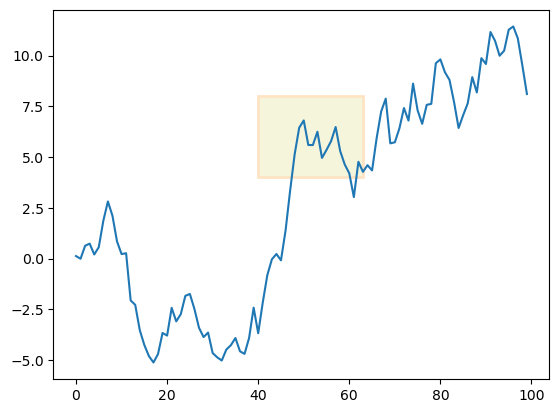

In [18]:
fig, ax = plt.subplots()
ax.plot(y)
rect = Rectangle((40, 4), 23, 4,
                 facecolor = "Beige",
                 edgecolor = "Bisque",
                 linewidth = 2)
ax.add_patch(rect)
plt.show()

La configuración del círculo es semejante, sustituyendo el ancho y el alto por el radio:

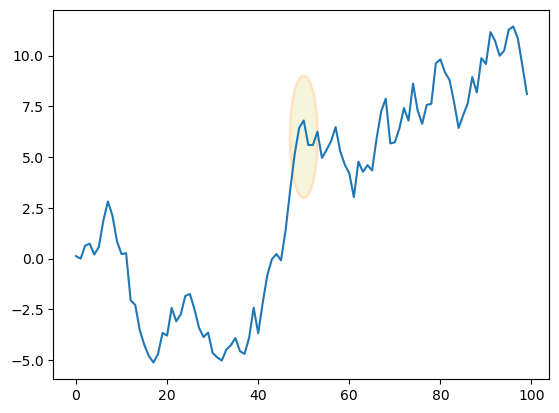

In [19]:
fig, ax = plt.subplots()
ax.plot(y)
rect = Circle((50, 6), 3,
                 facecolor = "Beige",
                 edgecolor = "Bisque",
                 linewidth = 2)
ax.add_patch(rect)
plt.show()

Vemos que si los ejes $x$ e $y$ no tienen la misma escala, el círculo se muestra como una elipse.

Probemos, por último, con el polígono. Para configurarlo hay que pasar, en una lista, tuplas con las posiciones de los puntos que lo definen. De esta forma, para crear, por ejemplo, un triángulo, habría que pasar tres tuplas, una para cada esquina:

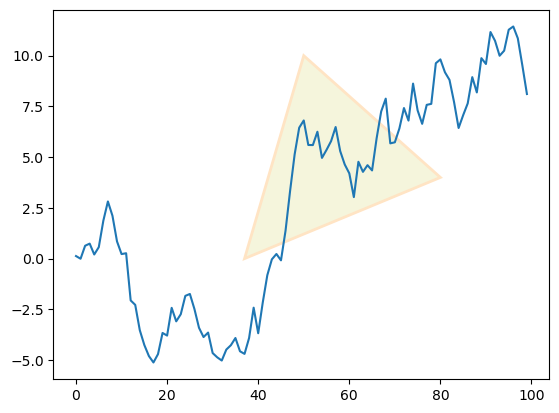

In [20]:
fig, ax = plt.subplots()
ax.plot(y)
polygon = Polygon([[37, 0], [80, 4], [50, 10]],
                 facecolor = "Beige",
                 edgecolor = "Bisque",
                 linewidth = 2)
ax.add_patch(polygon)
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>